***线性回归***

*对计算进行矢量化，从而利用线性代数库，而不是在Python中编写开销高昂的for循环*

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
import d2l_tools as d2l

向量相加的两种方法比较

In [2]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [3]:
# 定义计时器 
class Timer:
    # 记录多次运行时间
    def __init__(self):
        self.times=[]
        self.start()
    
    def start(self):
        # 启动计时器
        self.tik = time.time()
    
    def stop(self):
        # 停止计时器并将时间记录在列表
        self.times.append(time.time()-self.tik)
        return self.times[-1]
    
    def avg(self):
        # 返回平均时间
        return sum(self.times) / len(self.times)
    
    def sum(self):
        # 返回时间总和 
        return sum(self.times)
    
    def cumsum(self):
        # 返回累计时间
        return np.array(self.times).cumsum().tolist()

In [4]:
# 方法一 : for 循环
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.11000 sec'

In [5]:
# 方法二 : 使用重载的+运算符计算和
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

In [6]:
timer.times[0],timer.times[1]
"""
因此不要用昂贵的for循环
"""

'\n因此不要用昂贵的for循环\n'

正态分布
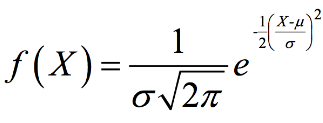

In [7]:
def normal(x,mu,sigma):
    p = 1 / (math.sqrt(2 * math.pi) * sigma)
    return p * np.exp(-0.5 * ((x - mu) / sigma)**2)

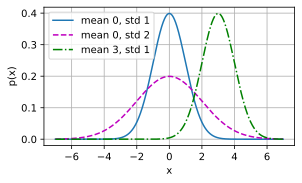

In [8]:
# 可视化正态分布
x = np.arange(-7, 7, 0.01)

params = [(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma) for mu,sigma in params],xlabel='x',
        ylabel='p(x)',figsize=(4.5,2.5),legend=[f'mean {mu}, std {sigma}' for mu,sigma in params])

***练习***
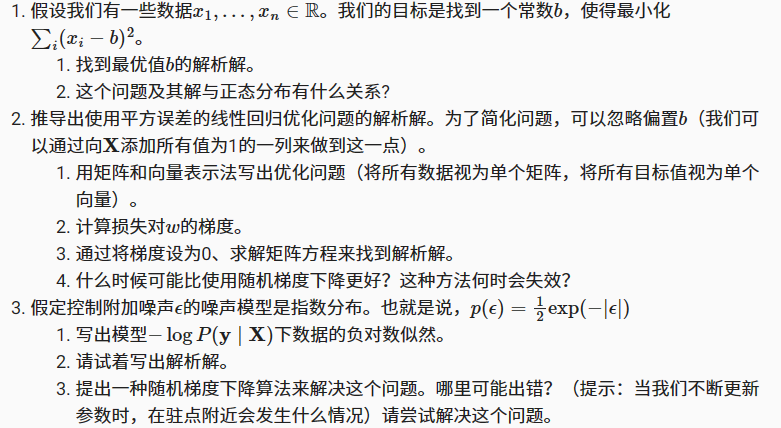

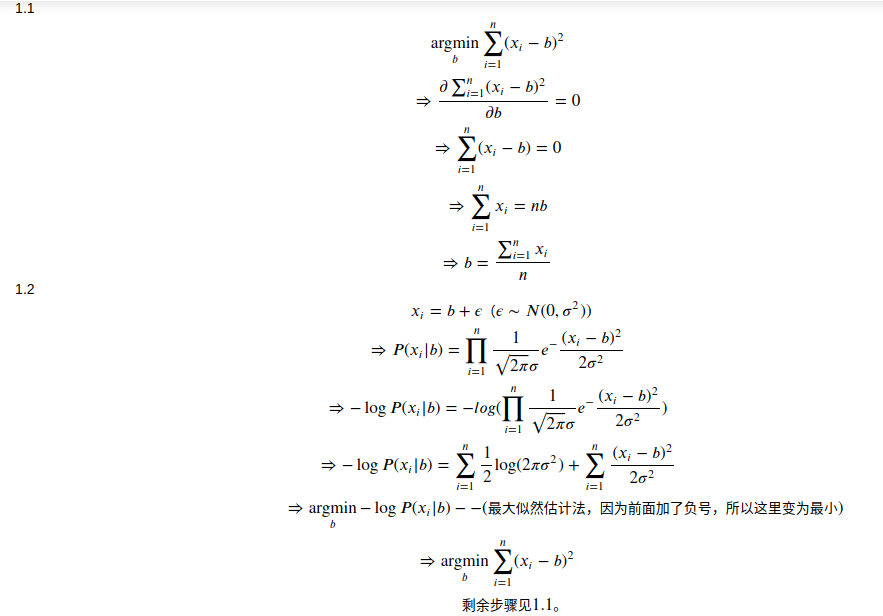

2.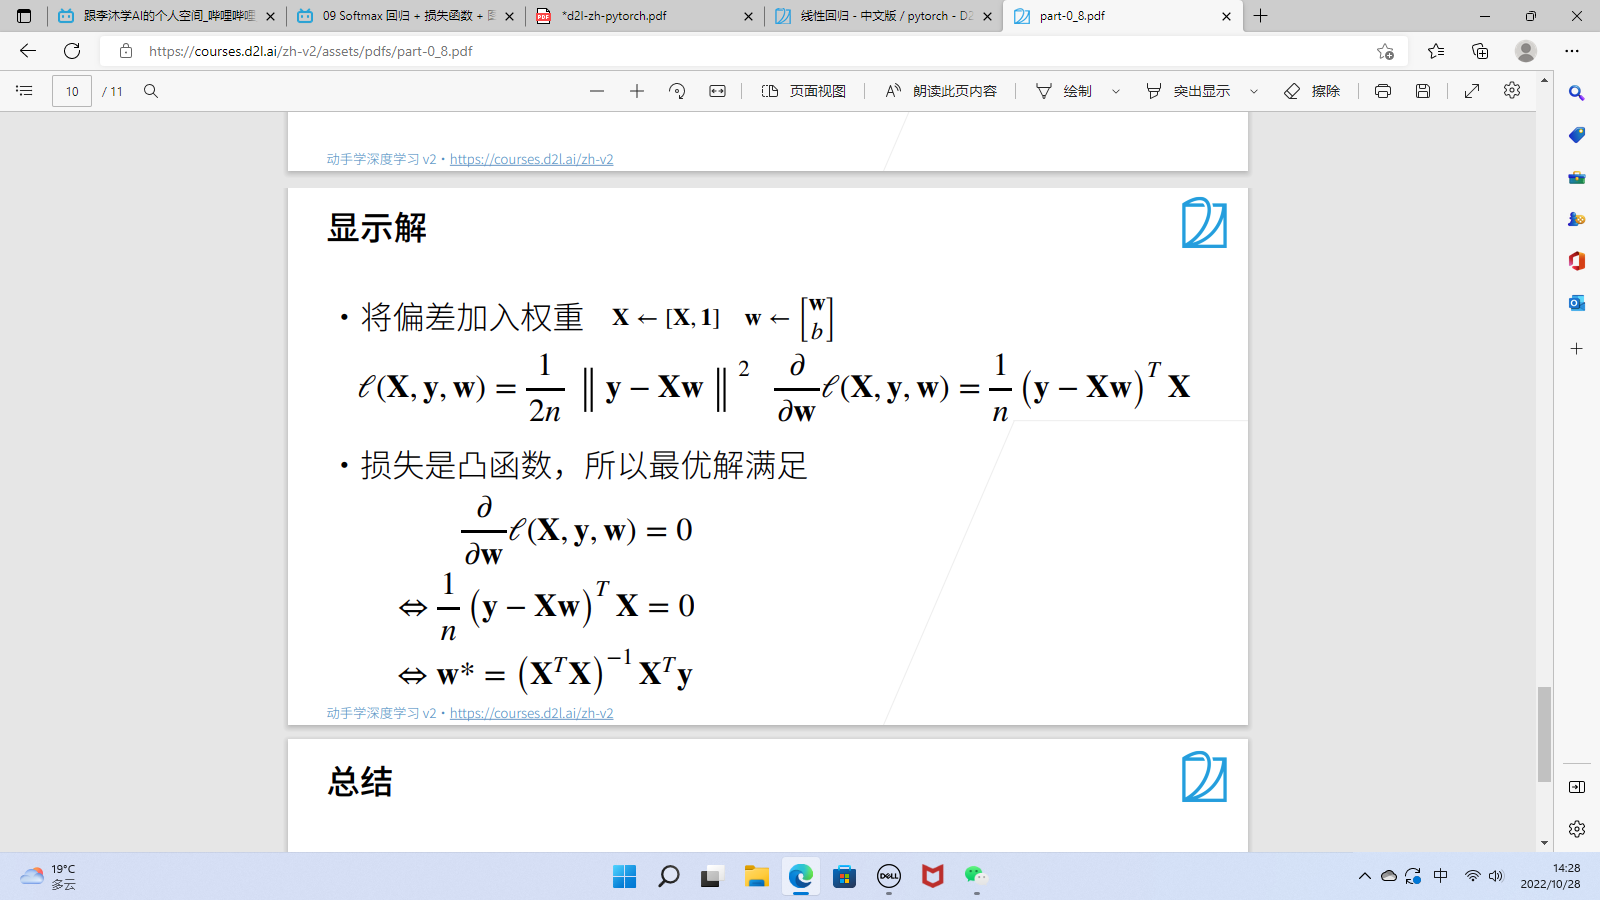

当整个样本计算出的梯度和部分样本集体计算出的梯度相差较大时，标准梯度下降会比批梯度下降更好。

3.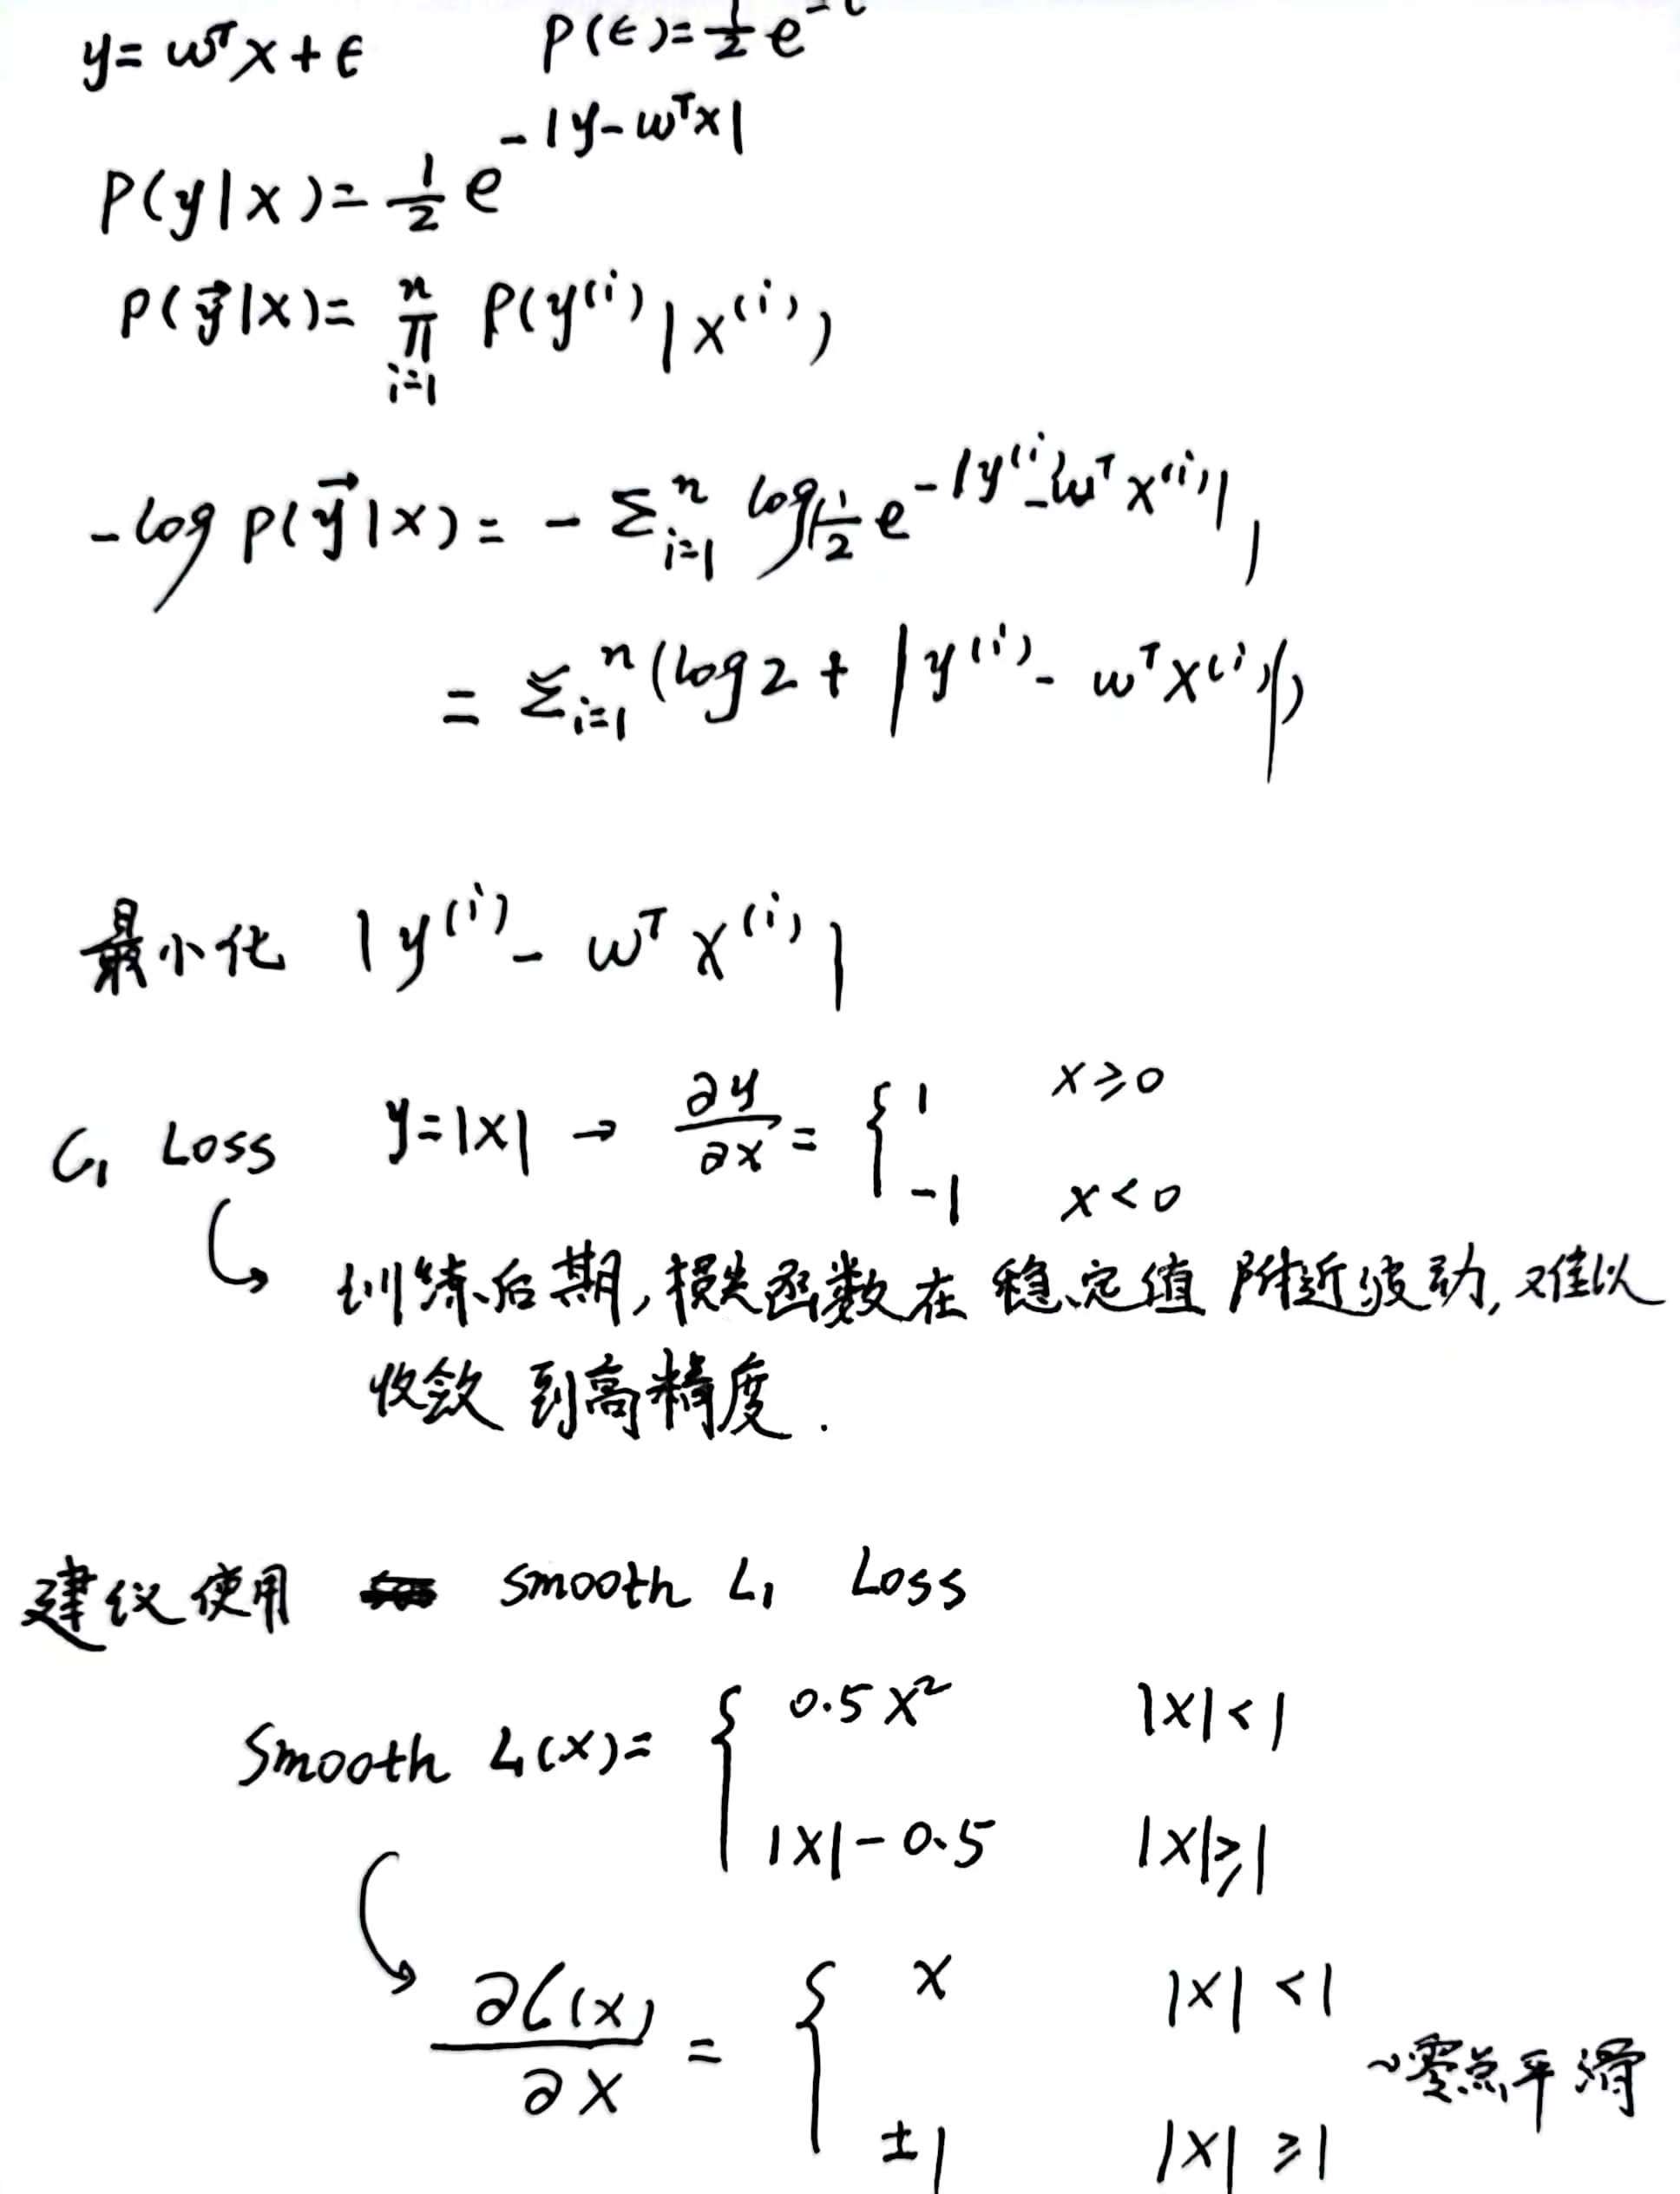